# Analyse statistique Projet Reparation infra

In [1]:
#import des bibliotheque
import pandas as pd
import numpy as pn
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Lecture de notre dataframe
df = pd.read_excel("reseau_en_arbre.xlsx")
df.head(10)

,id_batiment,nb_maisons,infra_id,infra_type,longueur
0,E000001,4,P007111,infra_intacte,12.314461
1,E000001,4,P007983,infra_intacte,40.320929
2,E000001,4,P000308,infra_intacte,39.140799
3,E000001,4,P007819,infra_intacte,17.390464
4,E000002,1,P007111,infra_intacte,12.314461
5,E000002,1,P007983,infra_intacte,40.320929
6,E000002,1,P000308,infra_intacte,39.140799
7,E000002,1,P007240,infra_intacte,10.914626
8,E000003,1,P007111,infra_intacte,12.314461
9,E000003,1,P007111,infra_intacte,12.314461


In [3]:
#compter le nombre de ligne colonnes dans le Dataframe
df.shape

(6107, 5)

In [4]:
print("Nous avons : 6107 Lignes\net 5 Colones")

Nous avons : 6107 Lignes
et 5 Colones


In [5]:
#Verification de nombre de doublons dans notre DataFrame de Depart
df.duplicated().sum()

521

In [6]:
#Verification des Valeurs manquantes
print("Nous avons au total dans notre DataFrame pour\nChaque colone:\n",df.isna().sum())

Nous avons au total dans notre DataFrame pour
Chaque colone:
 id_batiment    0
nb_maisons     0
infra_id       0
infra_type     0
longueur       0
dtype: int64


#supression des doublants

In [7]:
#Creation d'un Nouveau DataFrame sans doublant
df_prop = df.drop_duplicates()

In [8]:
#Verification du nouveau dataframe
print("Nous avons Maintenant:\n",df_prop.shape)

Nous avons Maintenant:
 (5586, 5)


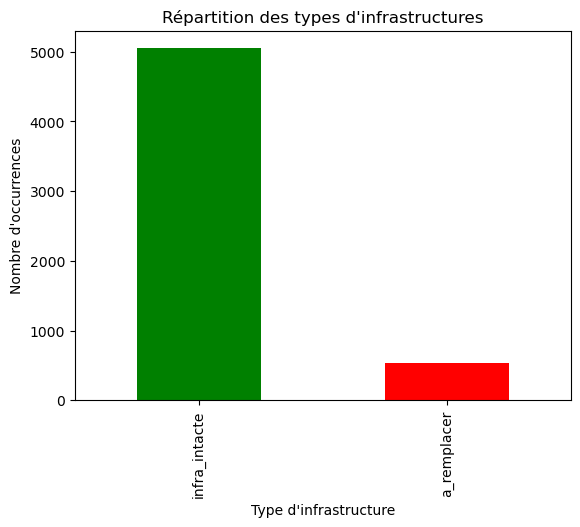

In [9]:
#premiere visualisation du de type_infra

df_prop['infra_type'].value_counts().plot(kind='bar', color=["green","red"])

plt.title("Répartition des types d'infrastructures")
plt.xlabel("Type d'infrastructure")
plt.ylabel("Nombre d'occurrences")
plt.show()

In [10]:
#Analyse descriptive de Notre Jeu de Donnée Propre
df_prop.describe()

,nb_maisons,longueur
count,5586.000000,5586.000000
mean,1.017723,28.948048
std,0.212941,21.370862
min,1.000000,0.372684
25%,1.000000,8.476727
50%,1.000000,27.234813
75%,1.000000,49.871725
max,4.000000,76.985593


In [11]:
#Analyse descriptive de Variable Categorielle
df_prop.describe(include="object")

,id_batiment,infra_id,infra_type
count,5586,5586,5586
unique,381,644,2
top,E000381,P007111,infra_intacte
freq,30,381,5049


In [12]:
#Verification de nombre de infra qui sont en bon etat sur notre nouveau DataFrame
df_intacte = df_prop[df_prop["infra_type"]=="infra_intacte"]

In [14]:
df_intacte.describe(include = "object")

,id_batiment,infra_id,infra_type
count,5049,5049,5049
unique,381,447,1
top,E000330,P007111,infra_intacte
freq,24,381,5049


In [16]:
#Analyse de remplacement
df_remplacer  = df_prop[df_prop["infra_type"]=="a_remplacer"]

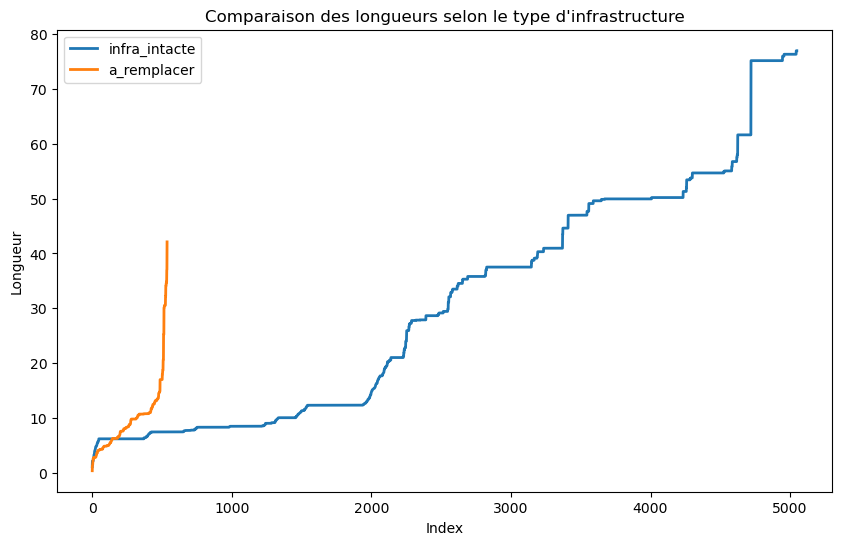

In [17]:
# visualisation de la longeur des des infra structure en fonction du type d'infra
#Selon qu'il est à remplacer ou intact
df_intacte = df_intacte.sort_values(by='longueur')
df_remplacer = df_remplacer.sort_values(by='longueur')

# Tracer les deux courbes
plt.figure(figsize=(10,6))
plt.plot(df_intacte['longueur'].values, label='infra_intacte', linewidth=2)
plt.plot(df_remplacer['longueur'].values, label='a_remplacer', linewidth=2)

plt.title("Comparaison des longueurs selon le type d'infrastructure")
plt.xlabel("Index")
plt.ylabel("Longueur")
plt.legend()
plt.show()

In [18]:
#Calcule de la longeure totale des infra à remplacer
long_a_remplacer = df_prop.loc[df['infra_type'] == 'a_remplacer', 'longueur'].sum()
print(f"Longueur totale à remplacer : {long_a_remplacer:.2f} mètres")

Longueur totale à remplacer : 5227.14 mètres


In [19]:
print("Il nous faut donc:\n",long_a_remplacer,"mettre\nPour resoudre notre probleme d'aprés notre premier df")

Il nous faut donc:
 5227.135708063434 mettre
Pour resoudre notre probleme d'aprés notre premier df


# Analyse sur le DataFame à Remplacer

In [20]:
#Creation du DataFrame à Remplacer
df_remplacer = df_prop[df_prop["infra_type"]=="a_remplacer"]

In [21]:
#Analyse statistique sur les variable
df_remplacer.describe()

,nb_maisons,longueur
count,537.0,537.000000
mean,1.0,9.733958
std,0.0,6.277592
min,1.0,0.372684
25%,1.0,5.627008
50%,1.0,8.821487
75%,1.0,10.787139
max,1.0,42.114422


In [22]:
#Analyse Statistique sur les Variables categorielle
df_remplacer.describe(include="object")

,id_batiment,infra_id,infra_type
count,537,537,537
unique,85,197,1
top,E000371,P005100,a_remplacer
freq,19,32,537


In [23]:
df_group = df_remplacer.groupby("id_batiment")["nb_maisons"].sum()

In [24]:
df_group.head()

id_batiment
E000003    3
E000067    3
E000085    3
E000098    2
E000106    4
Name: nb_maisons, dtype: int64

# Lecture du Nouveau DataFrame 

In [31]:
#Lecture du Dataframe infra
df_infra = pd.read_csv("infra.csv")

In [33]:
df_infra.head()

,id_infra,type_infra
0,P000719,aerien
1,P007118,aerien
2,P007170,fourreau
3,P007648,aerien
4,P000306,aerien


In [34]:
#compte le nombre le nombre de chaque element contenue dans la type_infra
df_infra.groupby("type_infra")["type_infra"].count()

type_infra
aerien         369
fourreau       197
semi-aerien     78
Name: type_infra, dtype: int64

In [35]:
#verification de nombre de ligne et ccolone de mon df_infra
df_infra.shape

(644, 2)

In [29]:
#verification s'il y'a des valeurs manquant
print("On a pas de valeur Manq:\n",df_infra.isna().sum())

On a pas de valeur Manq:
 id_infra      0
type_infra    0
dtype: int64


In [36]:
#verification s'il y'a des doublant ou pas
df_infra.duplicated().sum()

0

# Analyse statistique de df_infra


In [37]:
#comme c'est sont des variable categorielle on aura donc:
df_infra.describe(include="object")

,id_infra,type_infra
count,644,644
unique,644,3
top,P000719,aerien
freq,1,369


# Analyse de notre 3 eme Dataframe

In [38]:
#lecture du dataFrame
df_batiment = pd.read_csv("batiments.csv")

In [39]:
df_batiment.head()

,id_batiment,type_batiment,nb_maisons
0,E000160,habitation,8
1,E000367,habitation,3
2,E000032,habitation,1
3,E000017,habitation,7
4,E000339,habitation,1


In [40]:
#verification des doublant et val Manq
print("il y'a\n",df_batiment.duplicated().sum(),"doublant\net")
print(df_batiment.isna().sum(),"Val Manq\n")

il y'a
 0 doublant
et
id_batiment      0
type_batiment    0
nb_maisons       0
dtype: int64 Val Manq



In [41]:
df_batiment.shape

(381, 3)

In [42]:
#compter le nombre d'hopitaux, habitation et ecole
df_batiment["type_batiment"].value_counts()

type_batiment
habitation    379
hôpital         1
école           1
Name: count, dtype: int64

In [43]:
#l'hopital etant une prioriter cherchant les batiment qui ont des hopitaux
df_batiment[df_batiment["type_batiment"]=="hôpital"].head()

,id_batiment,type_batiment,nb_maisons
67,E000085,hôpital,1


In [44]:
# L'ecole etant notre deuxieme prioriter cherchant les batiments qui ont des ecoles
df_batiment[df_batiment["type_batiment"]=="école"].head()

,id_batiment,type_batiment,nb_maisons
172,E000106,école,1


In [45]:
#Jé fais une jointure des trois Dataframe
# jointure entre le df principal et les types d'infrastructure
df_merge1 = df_prop.merge(df_infra, left_on='infra_id', right_on='id_infra', how='left')

# jointure avec les infos des bâtiments
df_final = df_merge1.merge(df_batiment, on='id_batiment', how='left')

In [46]:
#Analyse de mon DataFrame finale
df_final.head()

,id_batiment,nb_maisons_x,infra_id,infra_type,longueur,id_infra,type_infra,type_batiment,nb_maisons_y
0,E000001,4,P007111,infra_intacte,12.314461,P007111,fourreau,habitation,3
1,E000001,4,P007983,infra_intacte,40.320929,P007983,aerien,habitation,3
2,E000001,4,P000308,infra_intacte,39.140799,P000308,fourreau,habitation,3
3,E000001,4,P007819,infra_intacte,17.390464,P007819,fourreau,habitation,3
4,E000002,1,P007111,infra_intacte,12.314461,P007111,fourreau,habitation,3


In [57]:
df_final["nb_maisons_y"].describe()

count    5586.000000
mean        4.341747
std         2.287822
min         1.000000
25%         2.000000
50%         4.000000
75%         6.000000
max         8.000000
Name: nb_maisons_y, dtype: float64

In [53]:
df_final.shape

(5586, 9)

In [48]:
#verification des doublants
print("On a\n",df_final.duplicated().sum(),"doublant dans notre df finale")

On a
 0 doublant dans notre df finale


In [64]:
#verification des Val Manq
print("on a\n",df_final.isna().sum(),"Val Manq Dans notre df_final")

on a
 id_batiment      0
nb_maisons_x     0
infra_id         0
infra_type       0
longueur         0
id_infra         0
type_infra       0
type_batiment    0
nb_maisons_y     0
dtype: int64 Val Manq Dans notre df_final


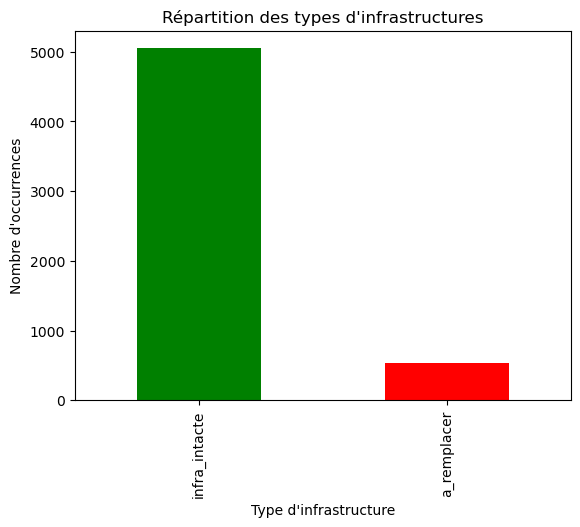

In [65]:
#Visualisation apres jointure
#premiere visualisation du de type_infra

df_final['infra_type'].value_counts().plot(kind='bar', color=["green","red"])

plt.title("Répartition des types d'infrastructures")
plt.xlabel("Type d'infrastructure")
plt.ylabel("Nombre d'occurrences")
plt.show()

# Les données suplémentaire apporte l'information sur exactitide du nombre de Maison 
# on va donc suprimer dans notre df_final la colone nb_maisons_x du premier dataFrame

In [52]:
#supression de la colone nb_maisons_x
df_finale = df_final.drop(columns=["nb_maisons_x"])
df_finale

,id_batiment,infra_id,infra_type,longueur,id_infra,type_infra,type_batiment,nb_maisons_y
0,E000001,P007111,infra_intacte,12.314461,P007111,fourreau,habitation,3
1,E000001,P007983,infra_intacte,40.320929,P007983,aerien,habitation,3
2,E000001,P000308,infra_intacte,39.140799,P000308,fourreau,habitation,3
3,E000001,P007819,infra_intacte,17.390464,P007819,fourreau,habitation,3
4,E000002,P007111,infra_intacte,12.314461,P007111,fourreau,habitation,3
...,...,...,...,...,...,...,...,...
5581,E000381,P008032,a_remplacer,10.520975,P008032,aerien,habitation,8
5582,E000381,P008035,a_remplacer,11.719759,P008035,aerien,habitation,8
5583,E000381,P004234,a_remplacer,13.484903,P004234,aerien,habitation,8
5584,E000381,P008036,a_remplacer,7.441760,P008036,semi-aerien,habitation,8


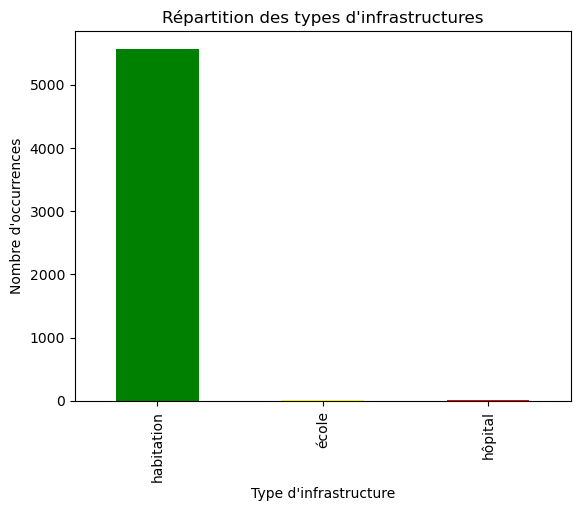

In [71]:
#Visualisation de nombre type de batiment apres jointure
#premiere visualisation du de type_infra

df_finale['type_batiment'].value_counts().plot(kind='bar', color=["green","yellow","red"])

plt.title("Répartition des types d'infrastructures")
plt.xlabel("Type d'infrastructure")
plt.ylabel("Nombre d'occurrences")
plt.show()

In [69]:
#Je filtre sur uniquement sur les colone a remplacer afin de finaliser la modelisation
df_remplace = df_finale[df_final['infra_type'] == 'a_remplacer']
df_remplace

,id_batiment,infra_id,infra_type,longueur,id_infra,type_infra,type_batiment,nb_maisons_y
9,E000003,P007113,a_remplacer,12.193509,P007113,aerien,habitation,1
10,E000003,P007984,a_remplacer,30.057598,P007984,aerien,habitation,1
11,E000003,P007823,a_remplacer,12.290283,P007823,aerien,habitation,1
426,E000067,P006193,a_remplacer,12.186388,P006193,fourreau,habitation,4
427,E000067,P002851,a_remplacer,10.803202,P002851,semi-aerien,habitation,4
...,...,...,...,...,...,...,...,...
5581,E000381,P008032,a_remplacer,10.520975,P008032,aerien,habitation,8
5582,E000381,P008035,a_remplacer,11.719759,P008035,aerien,habitation,8
5583,E000381,P004234,a_remplacer,13.484903,P004234,aerien,habitation,8
5584,E000381,P008036,a_remplacer,7.441760,P008036,semi-aerien,habitation,8


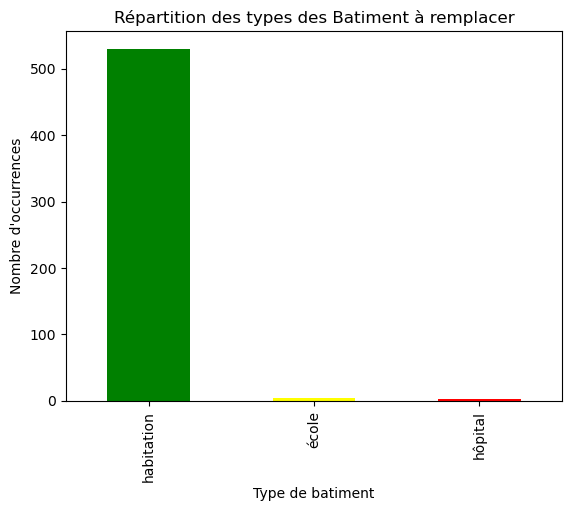

In [74]:
#Visualisation de nombre type de batiment à remplacer aprè jointure


df_remplace['type_batiment'].value_counts().plot(kind='bar', color=["green","yellow","red"])

plt.title("Répartition des types des Batiment à remplacer")
plt.xlabel("Type de batiment")
plt.ylabel("Nombre d'occurrences")
plt.show()

In [73]:
with pd.ExcelWriter("rapport_complet.xlsx") as writer:
    df_batiment.to_excel(writer, sheet_name="Batiments", index=False)
    df_infra.to_excel(writer, sheet_name="infra", index=False)
    df_prop.to_excel(writer, sheet_name="df_prop", index=False)

In [60]:
#Calculons la longuere totale à reparer pour chaque Batiment
longueur_p_batiment = df_remplace.groupby('id_batiment')['longueur'].sum().reset_index()
longueur_p_batiment.rename(columns={'longueur': 'longueur_a_remplacer'}, inplace=True)

In [62]:
#Fixassion des priorité
priorite = longueur_p_batiment.merge(df_batiment, on='id_batiment', how='left')

In [63]:
df_priorite = longueur_p_batiment.merge(df_batiment, on='id_batiment', how='left')

# Priorité selon type de bâtiment
priorite_batiment = {'hôpital': 3, 'école': 2, 'habitation': 1}
df_priorite['priorite_type_batiment'] = df_priorite['type_batiment'].map(priorite_batiment)


